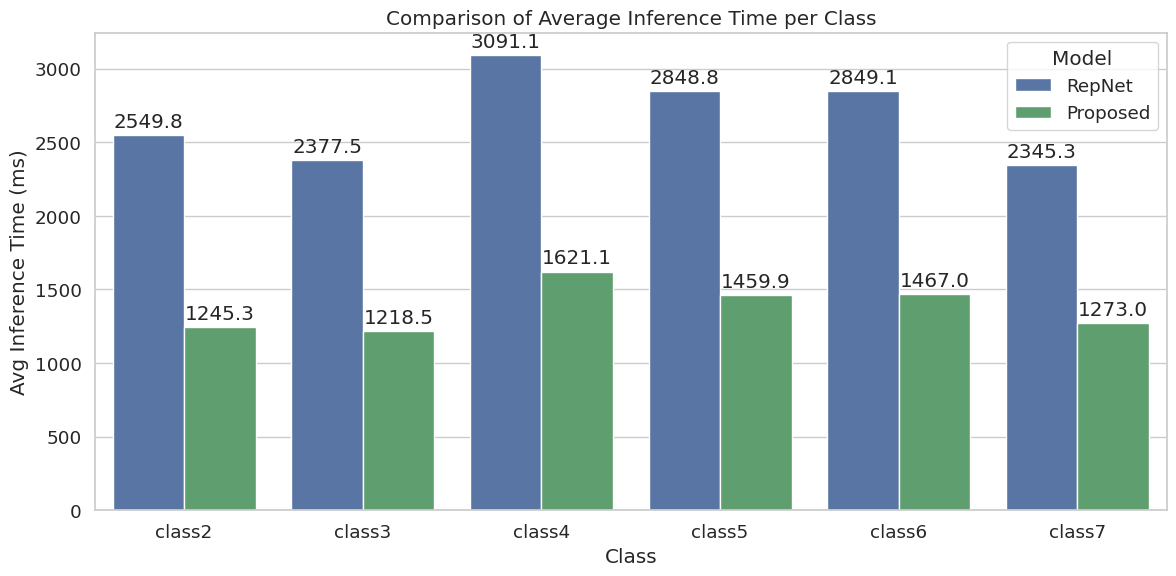

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data
repnet_data = {
    "class2":  2549.75,
    "class3": 2377.51,
    "class4": 3091.09,
    "class5": 2848.80,
    "class6": 2849.11,
    "class7": 2345.34,
}

proposed_data = {
    "class2": 1245.30,
    "class3": 1218.45,
    "class4": 1621.14,
    "class5": 1459.90,
    "class6": 1467.02,
    "class7": 1273.02,
}

# Convert to DataFrame for plotting
classes = list(repnet_data.keys())
df = pd.DataFrame({
    "Class": classes * 2,
    "Avg Inference Time (ms)": [repnet_data[c] for c in classes] + [proposed_data[c] for c in classes],
    "Model": ["RepNet"] * len(classes) + ["Proposed"] * len(classes),
})

# Plot
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df, x="Class", y="Avg Inference Time (ms)", hue="Model", palette=["#4C72B0", "#55A868"])

# Add value labels
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f", label_type="edge", padding=3)

plt.title("Comparison of Average Inference Time per Class")
plt.tight_layout()
plt.legend(title="Model", loc="upper right")
plt.show()


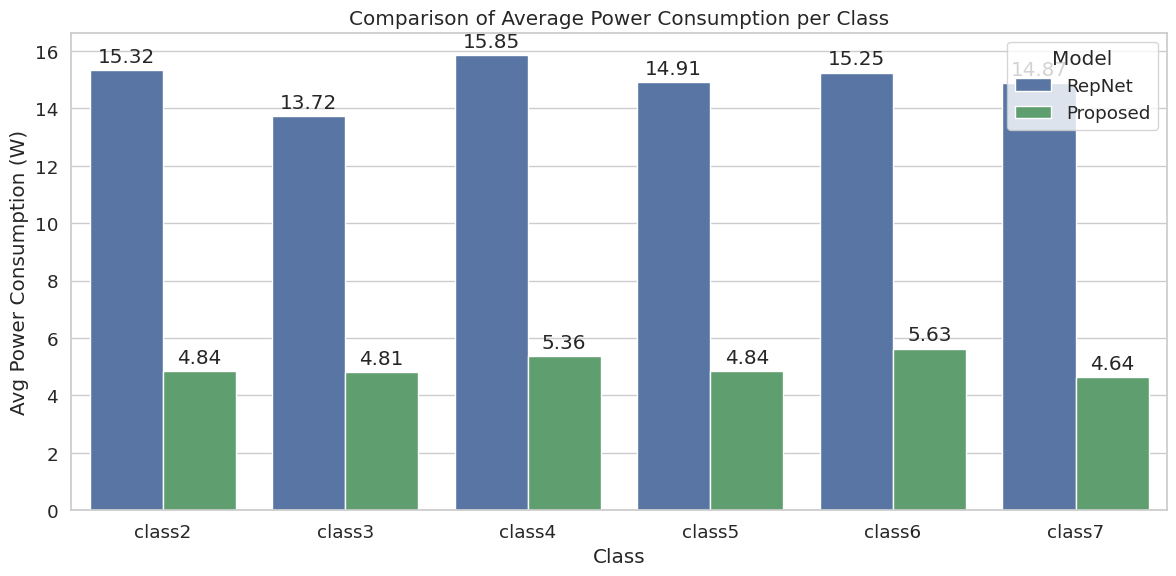

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data
repnet_power = {
    "class2": 15.32,
    "class3": 13.72,
    "class4": 15.85,
    "class5": 14.91,
    "class6": 15.25,
    "class7": 14.87,
}

proposed_power = {
    "class2": 4.84,
    "class3": 4.81,
    "class4": 5.36,
    "class5": 4.84,
    "class6": 5.63,
    "class7": 4.64,
}

# Convert to DataFrame
classes = list(repnet_power.keys())
df_power = pd.DataFrame({
    "Class": classes * 2,
    "Avg Power Consumption (W)": [repnet_power[c] for c in classes] + [proposed_power[c] for c in classes],
    "Model": ["RepNet"] * len(classes) + ["Proposed"] * len(classes),
})

# Plot
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_power, x="Class", y="Avg Power Consumption (W)", hue="Model", palette=["#4C72B0", "#55A868"])

# Add value labels
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", label_type="edge", padding=3)

plt.title("Comparison of Average Power Consumption per Class")
plt.tight_layout()
plt.legend(title="Model", loc="upper right")
plt.show()



/tmp/ipykernel_772579/4073373257.py:62: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df, x="Class", y=y_metric, hue="Model", palette=palette, ci=None)


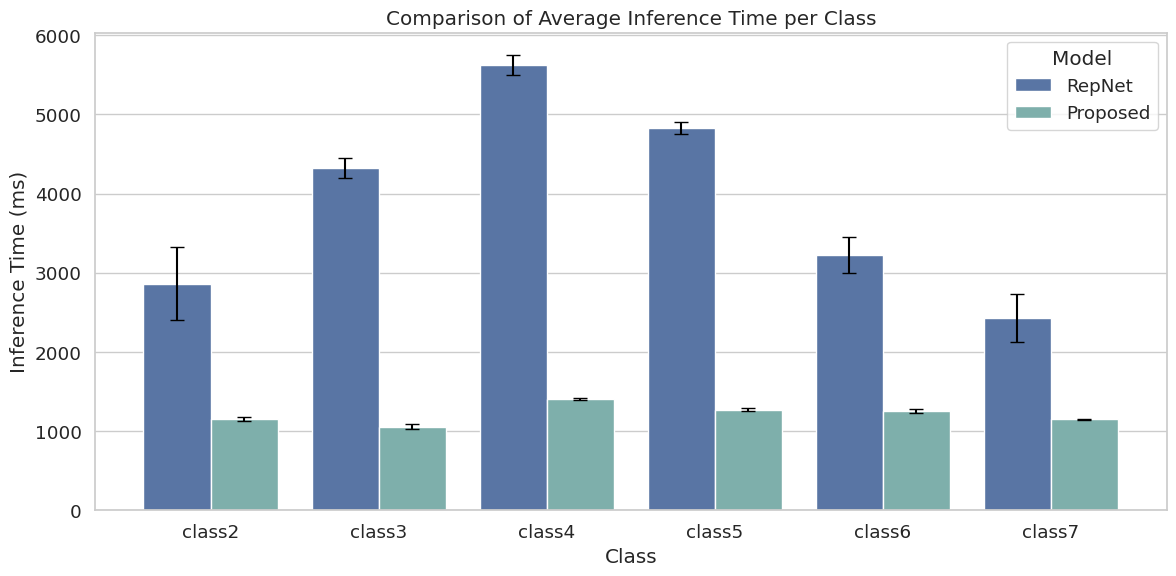

/tmp/ipykernel_772579/4073373257.py:62: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df, x="Class", y=y_metric, hue="Model", palette=palette, ci=None)


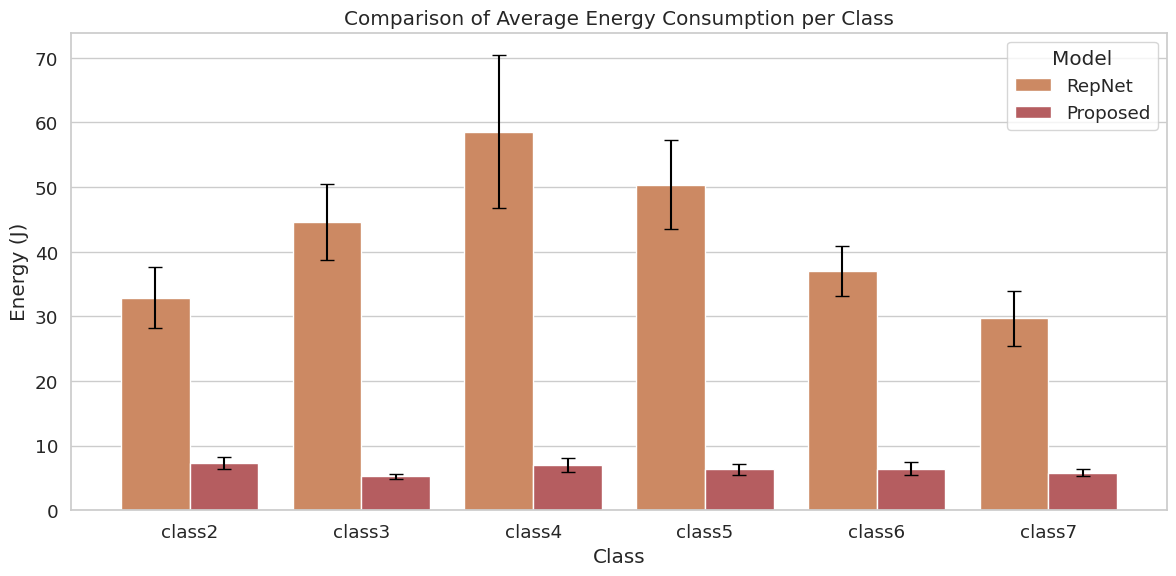

In [10]:
# Re-import libraries after code execution state reset
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Inference time data (ms) with standard deviation
repnet_inference = {
    "class2": (2863.22, 462.17),
    "class3": (4320.17, 127.43),
    "class4": (5623.32, 122.37),
    "class5": (4830.83, 78.51),
    "class6": (3223.60, 224.95),
    "class7": (2424.72, 303.23),
}

proposed_inference = {
    "class2": (1150.13, 22.79),
    "class3": (1054.81, 31.97),
    "class4": (1405.81, 16.09),
    "class5": (1270.92, 18.76),
    "class6": (1251.21, 26.81),
    "class7": (1146.94, 11.50),
}

# Energy consumption data (J) with standard deviation
repnet_energy = {
    "class2": (32.91, 4.78),
    "class3": (44.56, 5.87),
    "class4": (58.54, 11.85),
    "class5": (50.33, 6.88),
    "class6": (36.98, 3.84),
    "class7": (29.68, 4.22),
}

proposed_energy = {
    "class2": (7.32, 0.97),
    "class3": (5.25, 0.39),
    "class4": (7.02, 1.07),
    "class5": (6.31, 0.86),
    "class6": (6.41, 0.98),
    "class7": (5.82, 0.59),
}

def create_dataframe(data1, data2, metric_name):
    classes = list(data1.keys())
    df = pd.DataFrame({
        "Class": classes * 2,
        metric_name: [data1[c][0] for c in classes] + [data2[c][0] for c in classes],
        "Std Dev": [data1[c][1] for c in classes] + [data2[c][1] for c in classes],
        "Model": ["RepNet"] * len(classes) + ["Proposed"] * len(classes),
    })
    return df

# Create DataFrames
df_inference = create_dataframe(repnet_inference, proposed_inference, "Inference Time (ms)")
df_energy = create_dataframe(repnet_energy, proposed_energy, "Energy (J)")

# Plot function with safe error bar loop
def plot_metric(df, y_metric, title, palette=["#4C72B0", "#55A868"]):
    sns.set(style="whitegrid", font_scale=1.2)
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(data=df, x="Class", y=y_metric, hue="Model", palette=palette, ci=None)

    # Add error bars manually, safely aligned with bar patches
    for bar, std_dev in zip(ax.patches, df["Std Dev"]):
        height = bar.get_height()
        ax.errorbar(
            bar.get_x() + bar.get_width() / 2,
            height,
            yerr=std_dev,
            fmt='none',
            c='black',
            capsize=5
        )

    plt.title(title)
    plt.tight_layout()
    plt.legend(title="Model", loc="upper right")
    plt.show()

# Plot both metrics
plot_metric(df_inference, "Inference Time (ms)", "Comparison of Average Inference Time per Class", palette=["#4C72B0", "#76B7B2"] )
plot_metric(df_energy, "Energy (J)", "Comparison of Average Energy Consumption per Class", palette=["#DD8452", "#C44E52"])

/tmp/ipykernel_772579/1602866248.py:62: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df, x="Class", y=y_metric, hue="Model", palette=["#4C72B0", "#55A868"], ci=None)


IndexError: single positional indexer is out-of-bounds

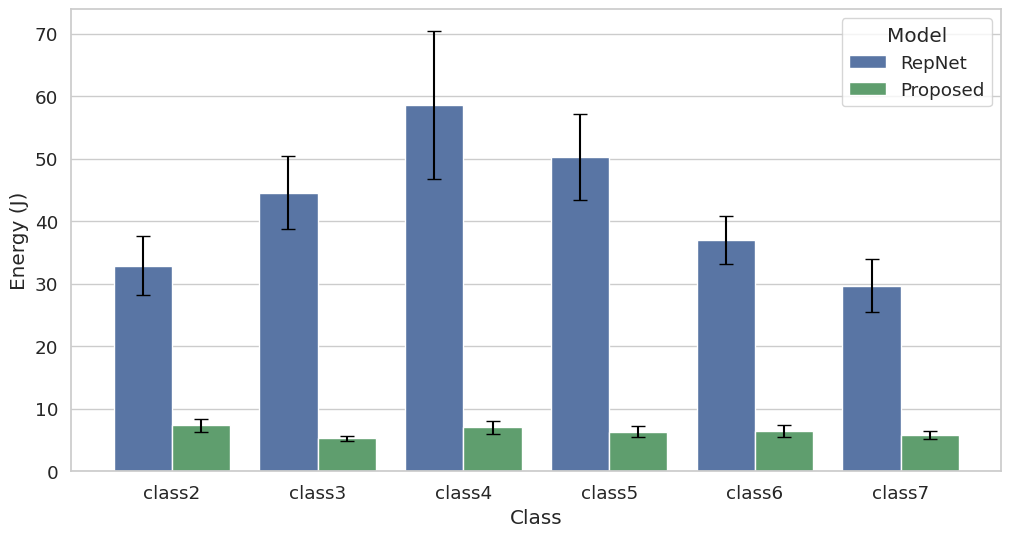

In [8]:
plot_metric(df_energy, "Energy (J)", "Comparison of Average Energy Consumption per Class")


/tmp/ipykernel_772579/2651908901.py:80: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df, x="Class", y=y_metric, hue="Model", palette=palette, ci=None)


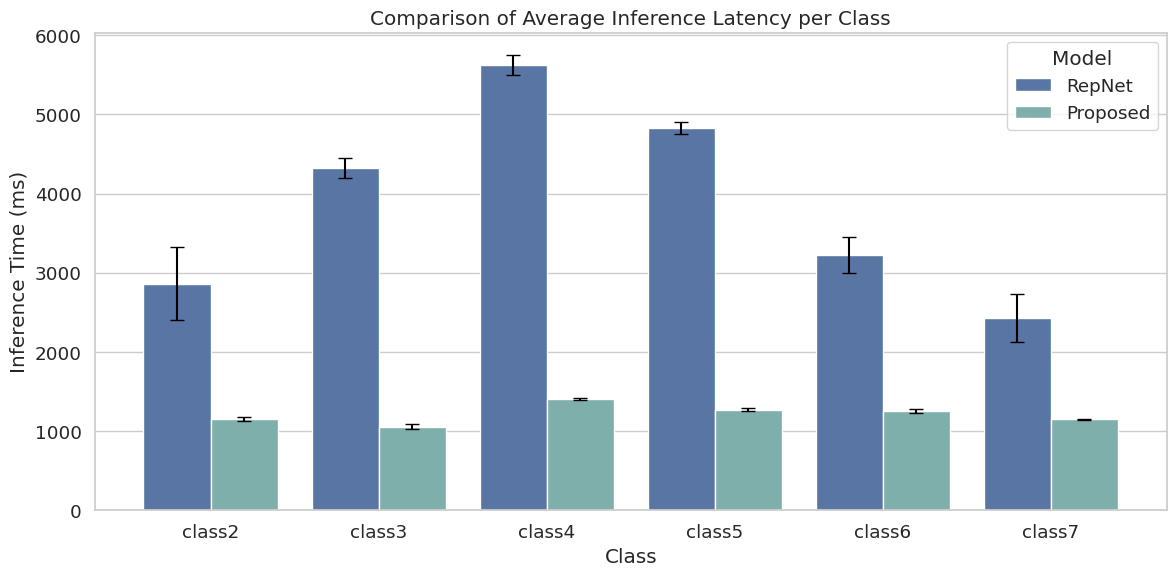

/tmp/ipykernel_772579/2651908901.py:80: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df, x="Class", y=y_metric, hue="Model", palette=palette, ci=None)


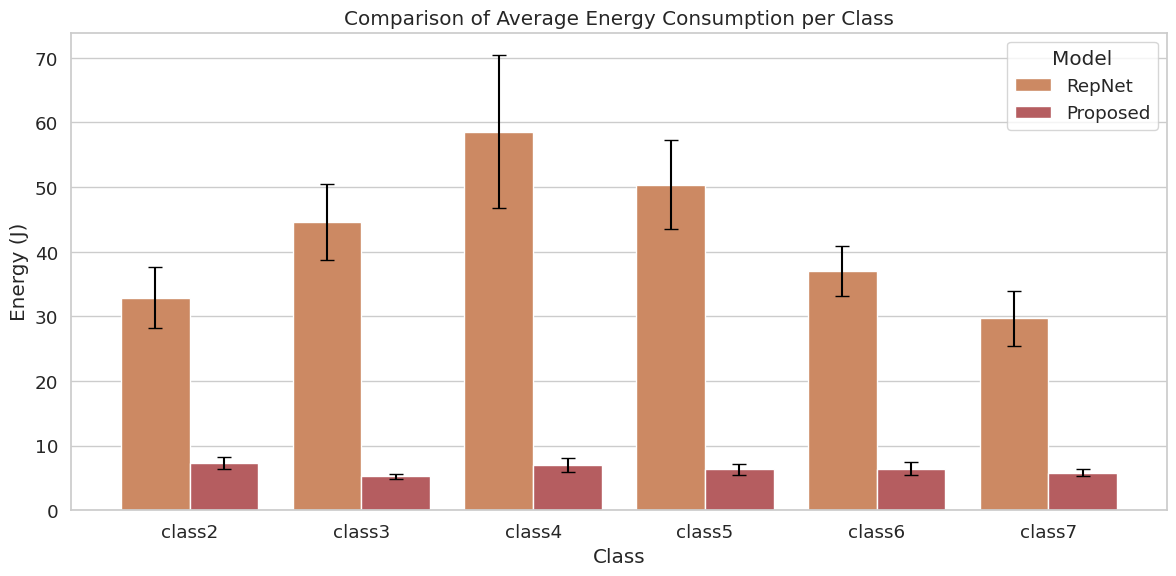

/tmp/ipykernel_772579/2651908901.py:80: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df, x="Class", y=y_metric, hue="Model", palette=palette, ci=None)


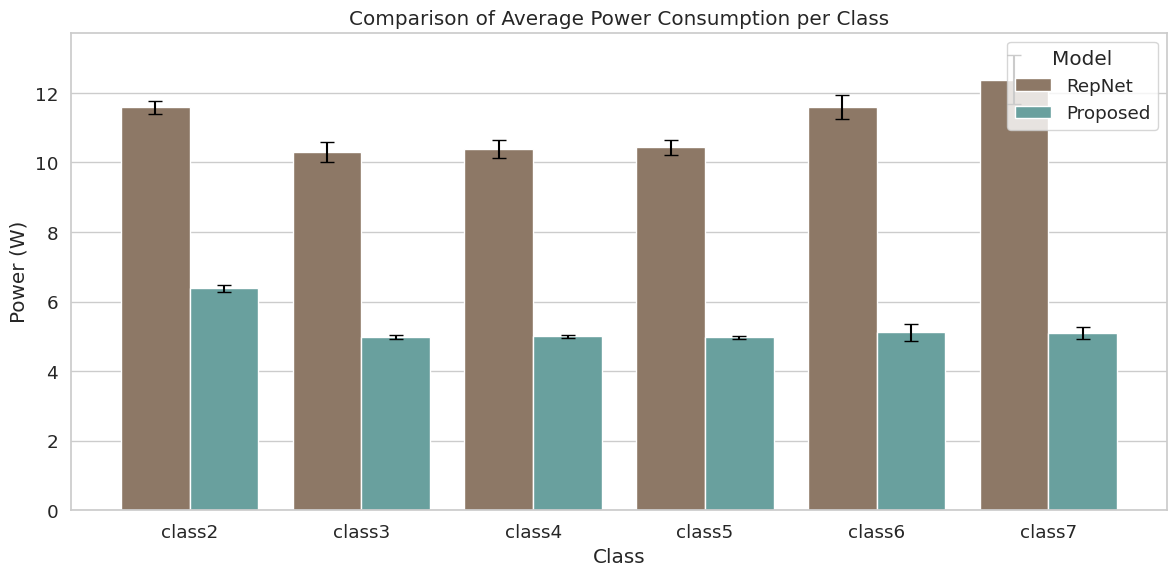

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define all data dictionaries
repnet_inference = {
    "class2": (2863.22, 462.17),
    "class3": (4320.17, 127.43),
    "class4": (5623.32, 122.37),
    "class5": (4830.83, 78.51),
    "class6": (3223.60, 224.95),
    "class7": (2424.72, 303.23),
}

proposed_inference = {
    "class2": (1150.13, 22.79),
    "class3": (1054.81, 31.97),
    "class4": (1405.81, 16.09),
    "class5": (1270.92, 18.76),
    "class6": (1251.21, 26.81),
    "class7": (1146.94, 11.50),
}

repnet_energy = {
    "class2": (32.91, 4.78),
    "class3": (44.56, 5.87),
    "class4": (58.54, 11.85),
    "class5": (50.33, 6.88),
    "class6": (36.98, 3.84),
    "class7": (29.68, 4.22),
}

proposed_energy = {
    "class2": (7.32, 0.97),
    "class3": (5.25, 0.39),
    "class4": (7.02, 1.07),
    "class5": (6.31, 0.86),
    "class6": (6.41, 0.98),
    "class7": (5.82, 0.59),
}

repnet_power = {
    "class2": (11.58, 0.20),
    "class3": (10.30, 0.28),
    "class4": (10.39, 0.25),
    "class5": (10.43, 0.21),
    "class6": (11.60, 0.34),
    "class7": (12.38, 0.70),
}

proposed_power = {
    "class2": (6.38, 0.11),
    "class3": (4.99, 0.06),
    "class4": (5.00, 0.04),
    "class5": (4.97, 0.04),
    "class6": (5.12, 0.24),
    "class7": (5.09, 0.18),
}

# Helper function to convert to DataFrame
def create_dataframe(data1, data2, metric_name):
    classes = list(data1.keys())
    df = pd.DataFrame({
        "Class": classes * 2,
        metric_name: [data1[c][0] for c in classes] + [data2[c][0] for c in classes],
        "Std Dev": [data1[c][1] for c in classes] + [data2[c][1] for c in classes],
        "Model": ["RepNet"] * len(classes) + ["Proposed"] * len(classes),
    })
    return df

# Create DataFrames
df_inference = create_dataframe(repnet_inference, proposed_inference, "Inference Time (ms)")
df_energy = create_dataframe(repnet_energy, proposed_energy, "Energy (J)")
df_power = create_dataframe(repnet_power, proposed_power, "Power (W)")

# Plot function
def plot_metric(df, y_metric, title, palette):
    sns.set(style="whitegrid", font_scale=1.2)
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(data=df, x="Class", y=y_metric, hue="Model", palette=palette, ci=None)

    # Add error bars manually
    for bar, std_dev in zip(ax.patches, df["Std Dev"]):
        height = bar.get_height()
        ax.errorbar(
            bar.get_x() + bar.get_width() / 2,
            height,
            yerr=std_dev,
            fmt='none',
            c='black',
            capsize=5
        )

    plt.title(title)
    plt.tight_layout()
    plt.legend(title="Model", loc="upper right")
    plt.show()

# Plot metrics
plot_metric(df_inference, "Inference Time (ms)", "Comparison of Average Inference Latency per Class", palette=["#4C72B0", "#76B7B2"])
plot_metric(df_energy, "Energy (J)", "Comparison of Average Energy Consumption per Class", palette=["#DD8452", "#C44E52"])
plot_metric(df_power, "Power (W)", "Comparison of Average Power Consumption per Class", palette=["#937860", "#60A9A6"])


In [28]:
import glob 
import event_tools.tools as tl
import event_tools.e2v as e2v
files = sorted(glob.glob(f"./event_csv/split_data/class[2-3]/*.csv"))
total_video_length = 0
for i in range(0, len(files), 5):
    average_video_length = 0 
    for file in files[i:i+5]:
        print(file)
        events = tl.load_event_data(file)
        print((events[-1,0] - events[0,0])/1e6)
        average_video_length += (events[-1,0] - events[0,0])/1e6
    average_video_length /= 5
    print(average_video_length)
    total_video_length += average_video_length
print(total_video_length/len(files)*5) 
    

./event_csv/split_data/class2/user02_fluorescent.csv
6.742241
./event_csv/split_data/class2/user02_fluorescent_led.csv
5.533837
./event_csv/split_data/class2/user02_lab.csv
5.668693
./event_csv/split_data/class2/user02_led.csv
5.756745
./event_csv/split_data/class2/user02_natural.csv
7.422415
6.2247862
./event_csv/split_data/class3/user02_fluorescent.csv
5.32947
./event_csv/split_data/class3/user02_fluorescent_led.csv
5.632499
./event_csv/split_data/class3/user02_lab.csv
5.822436
./event_csv/split_data/class3/user02_led.csv
6.82549
./event_csv/split_data/class3/user02_natural.csv
6.422431
6.0064652
6.115625700000001
